In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt

In [180]:
# !pip3 install plotly

In [181]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [182]:
df = pd.read_csv("/Users/deepakjhanji/Downloads/MS-case study/loan.csv")

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/610747297.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/deepakjhanji/Downloads/MS-case study/loan.csv")


In [183]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [184]:
df.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11])

In [186]:
"""The clasess are highly imbalanced"""
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [187]:
"""Check null values"""
df.isna().sum()/len(df)

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061913
emp_length                        0.027066
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.325805
purpose                           0.000000
title                             0.000277
zip_code                          0.000000
addr_state 

In [257]:
"""Drop colui=mns that have all nan"""
df1 = df.dropna(axis=1, how='all')

In [258]:
df1.isna().sum()/len(df)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

In [259]:
"""Removing below columns because because it has more than 50% to 97% null value"""
df1.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/863440965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True)


In [260]:
"""DROPPING SOME TEXT COLUMNS"""
df1.drop(['url','desc','zip_code'], axis=1, inplace=True)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/2220867483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['url','desc','zip_code'], axis=1, inplace=True)


In [261]:
df1.shape

(39717, 51)

In [262]:
print(df1.collections_12_mths_ex_med.value_counts())
print(df1.policy_code.value_counts())
print(df1.application_type.value_counts())
print(df1.chargeoff_within_12_mths.value_counts())
print(df1.tax_liens.value_counts())
print(df1.pub_rec_bankruptcies.value_counts())
print(df1.delinq_amnt.value_counts())
print(df1.initial_list_status.value_counts())

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
f    39717
Name: initial_list_status, dtype: int64


In [263]:
"""deleting columns which have only 1 value as it does not give us any info"""
df1.drop(['collections_12_mths_ex_med','policy_code','application_type','chargeoff_within_12_mths','tax_liens','delinq_amnt','initial_list_status'], axis=1, inplace=True)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/3445315480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['collections_12_mths_ex_med','policy_code','application_type','chargeoff_within_12_mths','tax_liens','delinq_amnt','initial_list_status'], axis=1, inplace=True)


In [264]:
df1.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [265]:
"""Replace nan with mode for emp_length"""
df1.emp_length.fillna(df1.emp_length.mode()[0], inplace = True)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/3238278107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.emp_length.fillna(df1.emp_length.mode()[0], inplace = True)


In [266]:
df1.isna().sum()/len(df1)

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.061913
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
purpose                    0.000000
title                      0.000277
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

In [267]:
"""Replace nan with mode for loan title"""
df1.title.fillna(df1.title.mode()[0], inplace = True)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/2842224087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.title.fillna(df1.title.mode()[0], inplace = True)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc863676dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc77c9530a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc86364d910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc77c953a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc77c953d30>],
 'means': []}

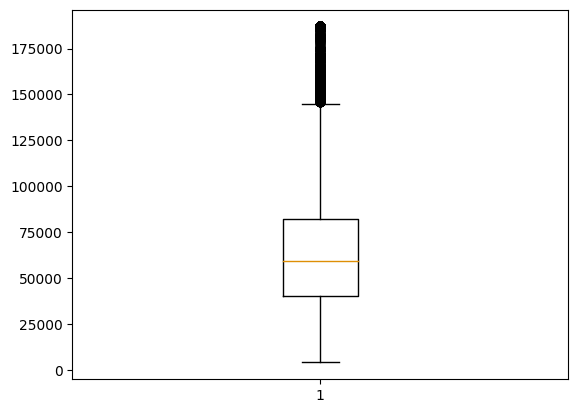

In [268]:
"""There are some outliers in annual_inc """
plt.boxplot(df1['annual_inc'])

In [269]:
df1.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    187000.00
Name: annual_inc, dtype: float64

In [270]:
"""Capping above 98th percentile with 98th percentile"""
# per_98_annual_inc = df1['annual_inc'].quantile(0.98)
# df1 = df1[df1.annual_inc <= per_98_annual_inc]

per_98_annual_inc = df1['annual_inc'].quantile(0.98)
df1['annual_inc'] = df1['annual_inc'].clip(upper=per_98_annual_inc)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/1465645971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['annual_inc'] = df1['annual_inc'].clip(upper=per_98_annual_inc)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7eca3b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7eca3ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc77c95f790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7eca3bf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7eca43250>],
 'means': []}

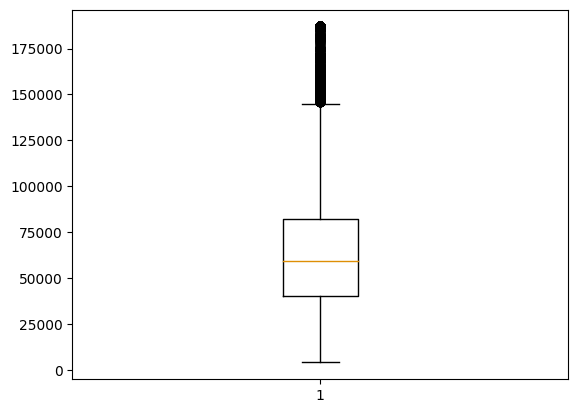

In [271]:
plt.boxplot(df1['annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7adc70b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7ab6190d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7adc61b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7ab619610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7ab6198b0>],
 'means': []}

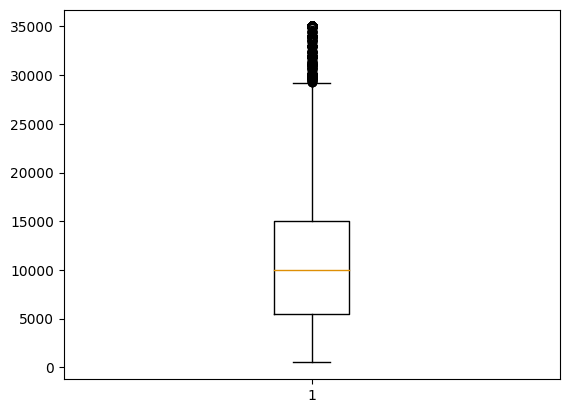

In [272]:
plt.boxplot(df1['loan_amnt'])

In [273]:
df1.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50    10000.0
0.75    15000.0
0.90    22000.0
0.95    25000.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [274]:
"""Capping above 98th percentile"""
per_98_annual_inc = df1['loan_amnt'].quantile(0.98)
df1['loan_amnt'] = df1['loan_amnt'].clip(upper=per_98_annual_inc)


/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/1162829447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_amnt'] = df1['loan_amnt'].clip(upper=per_98_annual_inc)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc85e3f32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc85e3f3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc85e3f3040>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc85e3f3d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc85e3f3f70>],
 'means': []}

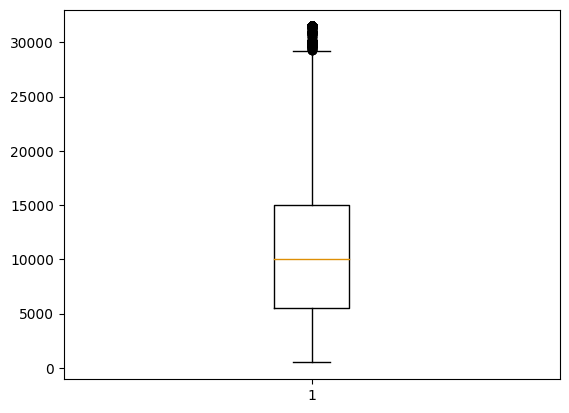

In [275]:
plt.boxplot(df1['loan_amnt'])

In [276]:
df1.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    12005.483028
Current        16798.115789
Fully Paid     10814.346889
Name: loan_amnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7dfba68e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7dfba6e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7ab648c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc7dfbb83a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7dfbb8640>],
 'means': []}

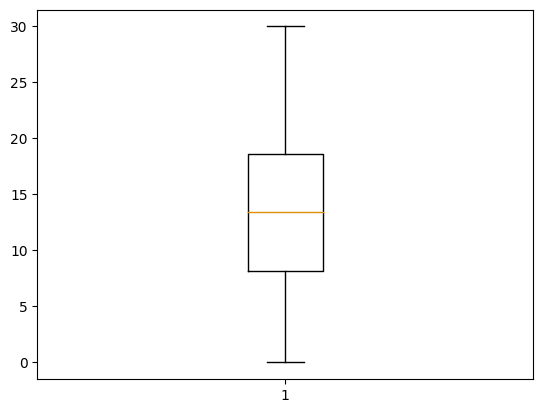

In [277]:
plt.boxplot(df1['dti'])

In [278]:
"""Categorical values"""

'Categorical values'

In [279]:
df1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0


<Axes: xlabel='loan_status', ylabel='count'>

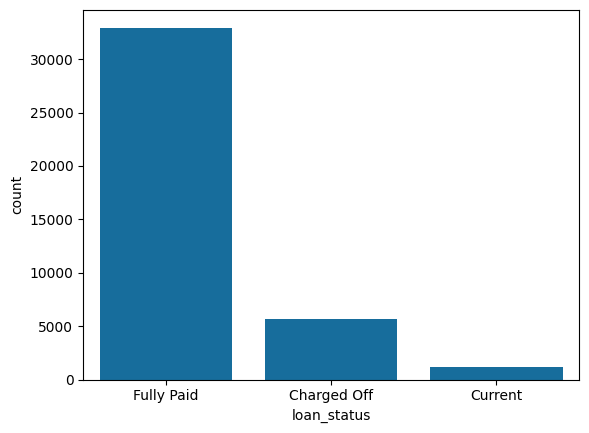

In [280]:
sns.countplot(x = 'loan_status', data = df1)

In [281]:
"""This is imbalanced. with 14% default rate"""
df1.loan_status.value_counts()/len(df1)

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

In [282]:
"""Average loan amount by each group"""
df1.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    12005.483028
Current        16798.115789
Fully Paid     10814.346889
Name: loan_amnt, dtype: float64

In [283]:
df1.groupby('loan_status')['loan_amnt'].median()

loan_status
Charged Off    10000.0
Current        15825.0
Fully Paid      9600.0
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

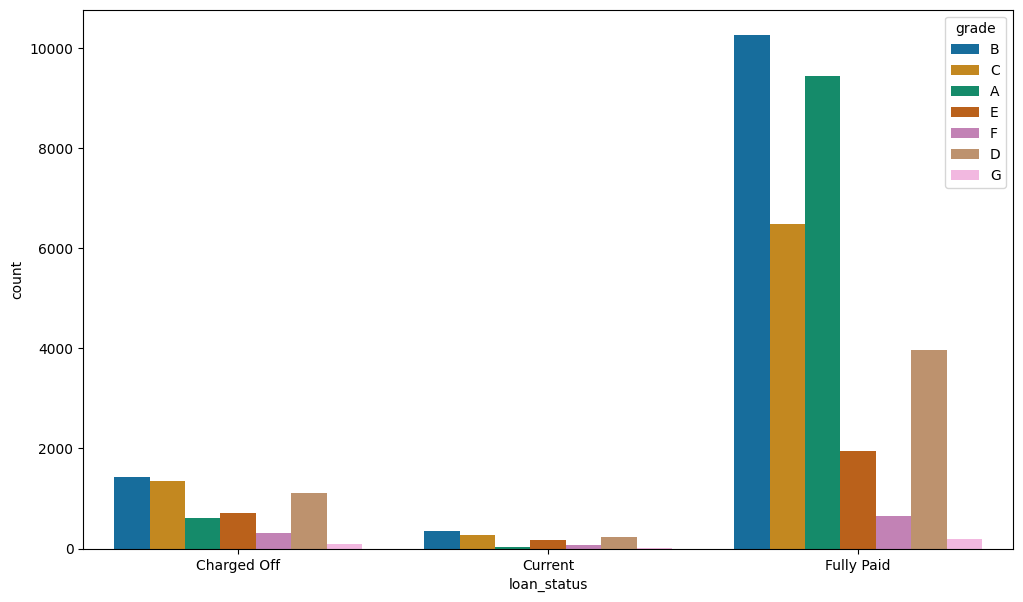

In [284]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'loan_status', order = ['Charged Off', 'Current', 'Fully Paid'] , hue = 'grade',data = df1)


In [285]:
df1[df1.loan_status == 'Charged Off']['grade'].value_counts()/len(df1[df1.loan_status == 'Charged Off'])

B    0.253243
C    0.239382
D    0.198685
E    0.127066
A    0.106984
F    0.056691
G    0.017949
Name: grade, dtype: float64

In [286]:
df1[df1.loan_status == 'Fully Paid']['grade'].value_counts()/len(df1[df1.loan_status == 'Fully Paid'])

B    0.311077
A    0.286586
C    0.196874
D    0.120395
E    0.059120
F    0.019939
G    0.006009
Name: grade, dtype: float64

- Loan grade A is assigned assigned to more customers who paid fully as compared to who defaulted. There is a major difference of around 18%
- Loan grade D is assigned to more defaulters as compared to those who fully paid
- Loan E,F and G are more assinged to those who defaulted as compared to those who paid full

In [287]:
"""Extract numerical part from subgrade"""
df1['sub_grade_num'] = df1.sub_grade.apply(lambda x : x[-1])

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/607417290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sub_grade_num'] = df1.sub_grade.apply(lambda x : x[-1])


<Axes: xlabel='grade', ylabel='count'>

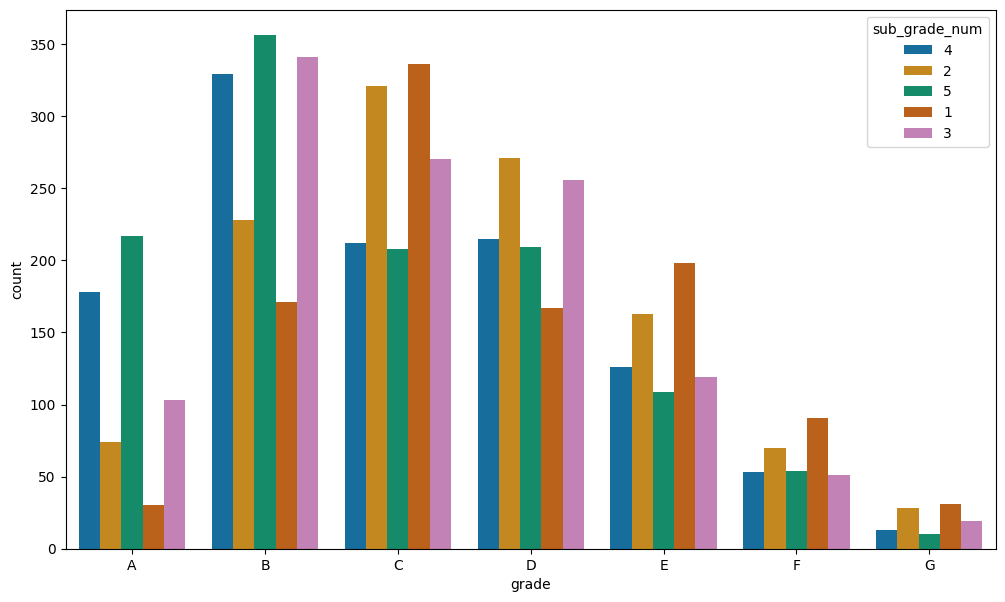

In [288]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_num',data = df1[df1.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

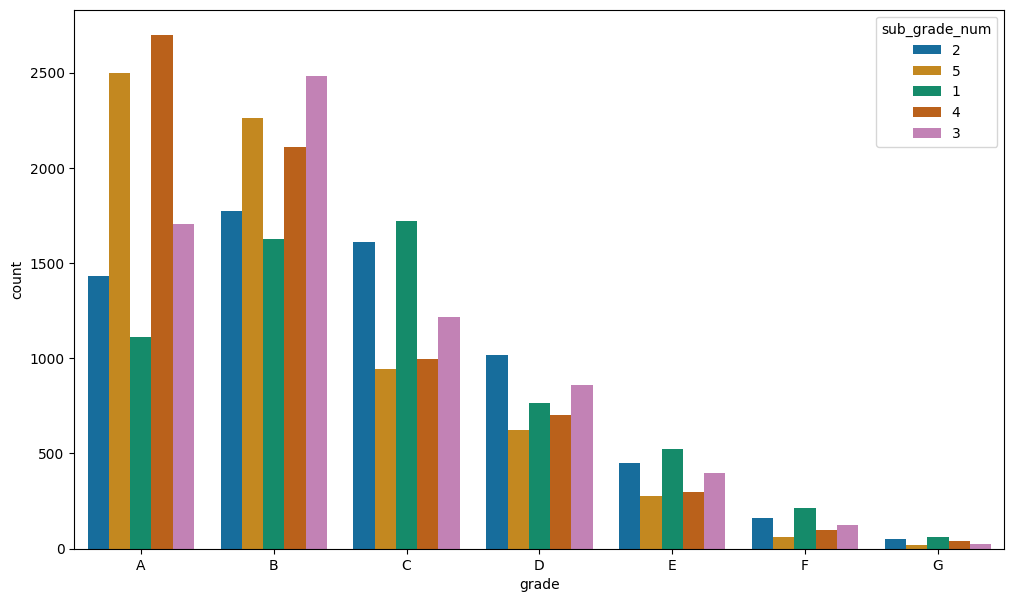

In [289]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_num',data = df1[df1.loan_status == 'Fully Paid'])

In [290]:
df1[(df1.loan_status == 'Charged Off') & (df1.grade == 'A')]['sub_grade_num'].value_counts()/len(df1[(df1.loan_status == 'Charged Off') & (df1.grade == 'A')])

5    0.360465
4    0.295681
3    0.171096
2    0.122924
1    0.049834
Name: sub_grade_num, dtype: float64

In [291]:
df1[(df1.loan_status == 'Fully Paid') & (df1.grade == 'A')]['sub_grade_num'].value_counts()/len(df1[(df1.loan_status == 'Fully Paid') & (df1.grade == 'A')])

4    0.285397
5    0.264535
3    0.180769
2    0.151859
1    0.117441
Name: sub_grade_num, dtype: float64

- Loan sub grade 1 is assigned to more customers who paid fully as compared to who defaulted for grade A
- Loan sub grade 5 is assigned to more defaulters as compared to those who fully paid for grade A

<Axes: xlabel='grade', ylabel='count'>

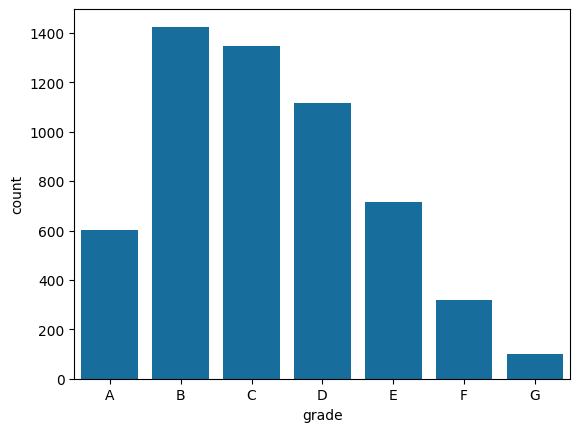

In [292]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , data = df1[df1.loan_status == 'Charged Off'])

In [293]:
df1.groupby(['loan_status','grade'])['loan_amnt'].mean()

loan_status  grade
Charged Off  A         7794.049834
             B        10857.638596
             C        10984.139569
             D        12125.194991
             E        15627.107692
             F        18900.128527
             G        18183.891089
Current      A        10174.375000
             B        17056.565217
             C        16475.723485
             D        15383.450450
             E        17945.407821
             F        21225.424658
             G        19527.117647
Fully Paid   A         8654.251827
             B        10904.127024
             C        10718.691691
             D        12049.226872
             E        15414.910678
             F        17298.722983
             G        20799.924242
Name: loan_amnt, dtype: float64

In [294]:
df1.groupby(['loan_status','grade'])['id'].count()

loan_status  grade
Charged Off  A          602
             B         1425
             C         1347
             D         1118
             E          715
             F          319
             G          101
Current      A           40
             B          345
             C          264
             D          222
             E          179
             F           73
             G           17
Fully Paid   A         9443
             B        10250
             C         6487
             D         3967
             E         1948
             F          657
             G          198
Name: id, dtype: int64

In [295]:
df1.groupby(['loan_status','grade','sub_grade'])['id'].count()

loan_status  grade  sub_grade
Charged Off  A      A1             30
                    A2             74
                    A3            103
                    A4            178
                    A5            217
             B      B1            171
                    B2            228
                    B3            341
                    B4            329
                    B5            356
             C      C1            336
                    C2            321
                    C3            270
                    C4            212
                    C5            208
             D      D1            167
                    D2            271
                    D3            256
                    D4            215
                    D5            209
             E      E1            198
                    E2            163
                    E3            119
                    E4            126
                    E5            109
             F      

In [296]:
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39020.000000
mean,6.831319e+05,8.504636e+05,11154.856485,10947.713196,10397.448868,324.561922,66550.694877,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.043260
std,2.106941e+05,2.656783e+05,7263.615387,7187.238670,7128.450439,208.874874,36372.894052,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,59000.000000,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,82300.000000,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.000000
max,1.077501e+06,1.314167e+06,31468.000000,35000.000000,35000.000000,1305.190000,187000.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,2.000000


In [297]:
df1.shape

(39717, 45)

<Axes: title={'center': 'loan_amnt'}, xlabel='grade'>

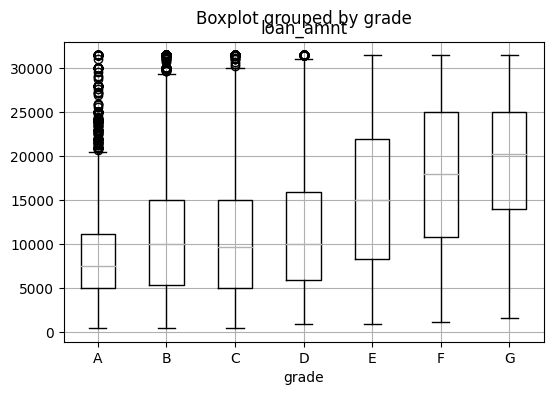

In [298]:
fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['loan_amnt'], by='grade', ax=ax)

In [299]:
df1[df1]

ValueError: Boolean array expected for the condition, not int64

- The median value of grade E,F and G is more than that of grade A. Does that mean people who have defaulted, requested for big loan amount. Lets find out below

In [ ]:
df1[df1.grade == 'D']['loan_status'].value_counts()/len(df1[df1.grade == 'D'])

Fully Paid     0.747503
Charged Off    0.210665
Current        0.041832
Name: loan_status, dtype: float64

In [ ]:
df1[df1.grade == 'E']['loan_status'].value_counts()/len(df1[df1.grade == 'E'])

Fully Paid     0.685433
Charged Off    0.251583
Current        0.062984
Name: loan_status, dtype: float64

In [ ]:
df1[df1.grade == 'F']['loan_status'].value_counts()/len(df1[df1.grade == 'F'])

Fully Paid     0.626311
Charged Off    0.304099
Current        0.069590
Name: loan_status, dtype: float64

In [ ]:
df1[df1.grade == 'G']['loan_status'].value_counts()/len(df1[df1.grade == 'G'])

Fully Paid     0.626582
Charged Off    0.319620
Current        0.053797
Name: loan_status, dtype: float64

In [ ]:
df1[df1.grade == 'A']['loan_status'].value_counts()/len(df1[df1.grade == 'A'])

Fully Paid     0.936341
Charged Off    0.059693
Current        0.003966
Name: loan_status, dtype: float64

Grade A has only 5 % default rate while grade F and G have ~30% default rate

In [ ]:
df1[(df1.grade == 'G') & (df1.loan_amnt >= 20000)]['loan_status'].value_counts()/len(df1[(df1.grade == 'G') & (df1.loan_amnt >= 20000)])

Fully Paid     0.695187
Charged Off    0.256684
Current        0.048128
Name: loan_status, dtype: float64

In [ ]:
df1[(df1.grade == 'G') & (df1.loan_amnt <= 20000)]['loan_status'].value_counts()/len(df1[(df1.grade == 'G') & (df1.loan_amnt <= 20000)])

Fully Paid     0.544304
Charged Off    0.392405
Current        0.063291
Name: loan_status, dtype: float64

 - Interesting, Grade G has highest default rate but borrowers who applied for loan less than 20K(median value) has around 39% default rate as compared to those who applied more than 20K. We will drill this further down going forward

In [300]:
df1[(df1.grade == 'A') & (df1.loan_amnt >= 7500)]['loan_status'].value_counts()/len(df1[(df1.grade == 'A') & (df1.loan_amnt >= 7500)])

Fully Paid     0.942049
Charged Off    0.052488
Current        0.005463
Name: loan_status, dtype: float64

In [301]:
df1[(df1.grade == 'A') & (df1.loan_amnt <= 7500)]['loan_status'].value_counts()/len(df1[(df1.grade == 'A') & (df1.loan_amnt <= 7500)])

Fully Paid     0.930656
Charged Off    0.066797
Current        0.002547
Name: loan_status, dtype: float64

 - But, Grade A has lowest default rate but borrowers who applied for loan less than or greater than the median value  - there isn't much difference

<Axes: title={'center': 'loan_amnt'}, xlabel='grade'>

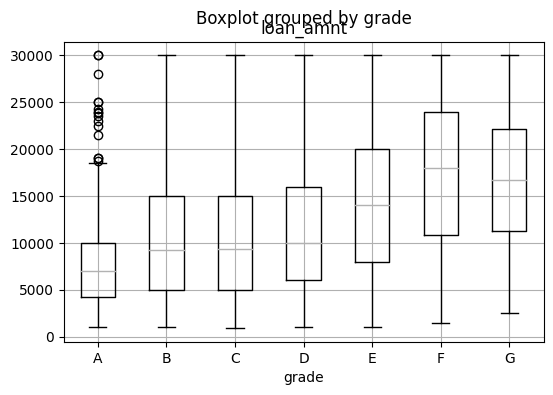

In [52]:
fig, ax = plt.subplots(figsize=(6,4))
df1[df1.loan_status == 'Charged Off'].boxplot(column=['loan_amnt'], by='grade', ax=ax)

<Axes: title={'center': 'loan_amnt'}, xlabel='grade'>

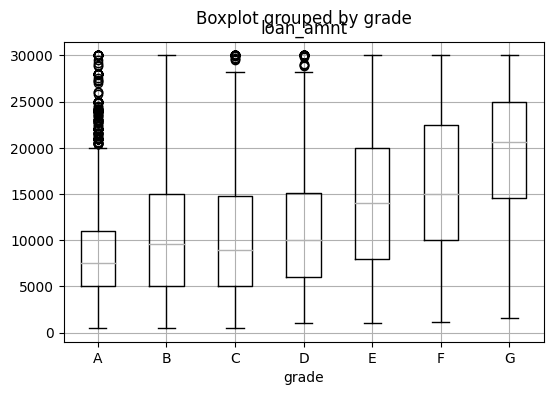

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
df1[df1.loan_status == 'Fully Paid'].boxplot(column=['loan_amnt'], by='grade', ax=ax)

- Only in case of grade G, the median loan value is significantly higher in default as compared to non-defaulters

In [54]:
df1[["total_pymnt","last_pymnt_amnt","loan_amnt"]].corr()

,total_pymnt,last_pymnt_amnt,loan_amnt
total_pymnt,1.000000,0.449345,0.883820
last_pymnt_amnt,0.449345,1.000000,0.424506
loan_amnt,0.883820,0.424506,1.000000


<Axes: title={'center': 'loan_amnt'}, xlabel='term'>

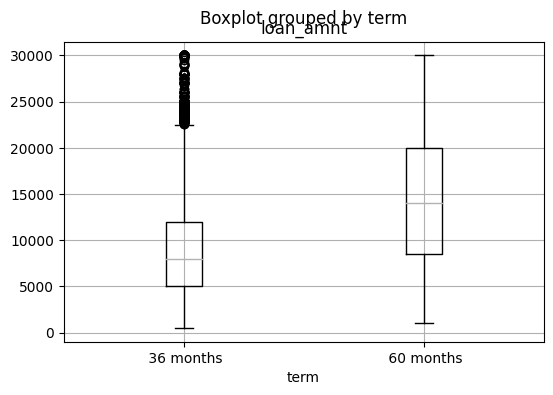

In [55]:
fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['loan_amnt'], by='term', ax=ax)

In [56]:
df1.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0,0.0,2


In [177]:
df1.emp_title.value_counts(ascending=False).head(5)

US Army            128
Bank of America    108
AT&T                58
IBM                 54
Wells Fargo         53
Name: emp_title, dtype: int64

In [58]:
df1.emp_length.value_counts(ascending=False)

10+ years    9376
< 1 year     4462
2 years      4254
3 years      3966
4 years      3316
1 year       3168
5 years      3167
6 years      2154
7 years      1714
8 years      1403
9 years      1220
Name: emp_length, dtype: int64

<Axes: title={'center': 'loan_amnt'}, xlabel='loan_status'>

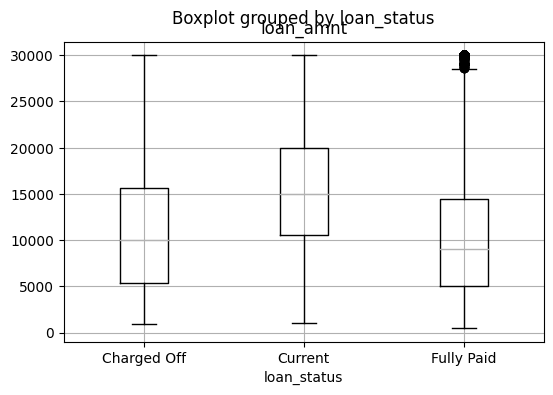

In [59]:
fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['loan_amnt'], by='loan_status', ax=ax)

<Axes: title={'center': 'loan_amnt'}, xlabel='home_ownership'>

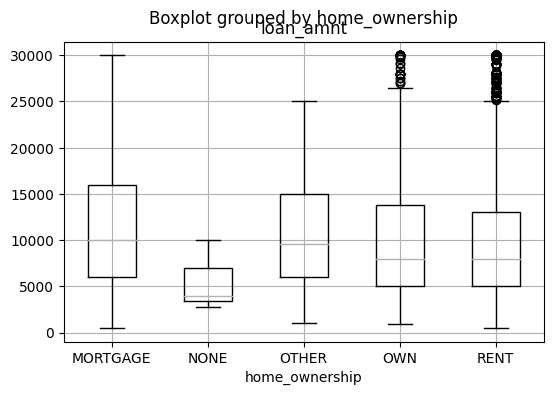

In [60]:
fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['loan_amnt'], by='home_ownership', ax=ax)

In [61]:
#replacing 'NONE' with 'OTHERS'
df1['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: title={'center': 'loan_amnt'}, xlabel='home_ownership'>

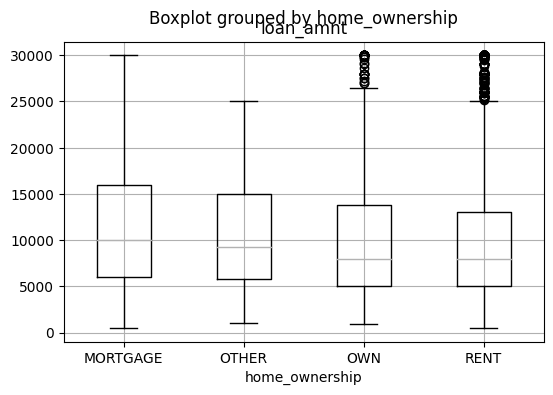

In [62]:
fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['loan_amnt'], by='home_ownership', ax=ax)

In [63]:
df1[df1.loan_status == 'Charged Off']['home_ownership'].value_counts()/len(df1[df1.loan_status == 'Charged Off'])

RENT        0.513755
MORTGAGE    0.403346
OWN         0.079740
OTHER       0.003160
Name: home_ownership, dtype: float64

In [64]:
df1[df1.loan_status == 'Fully Paid']['home_ownership'].value_counts()/len(df1[df1.loan_status == 'Fully Paid'])

RENT        0.484302
MORTGAGE    0.435730
OWN         0.077419
OTHER       0.002548
Name: home_ownership, dtype: float64

- There isn't much difference in terms of home_ownership

<Axes: xlabel='home_ownership', ylabel='count'>

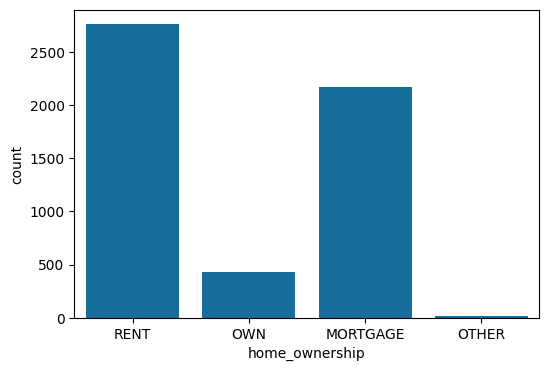

In [65]:
fig, ax = plt.subplots(figsize = (6,4))
# ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df1[df1['loan_status']=='Charged Off'])

<Axes: xlabel='home_ownership', ylabel='count'>

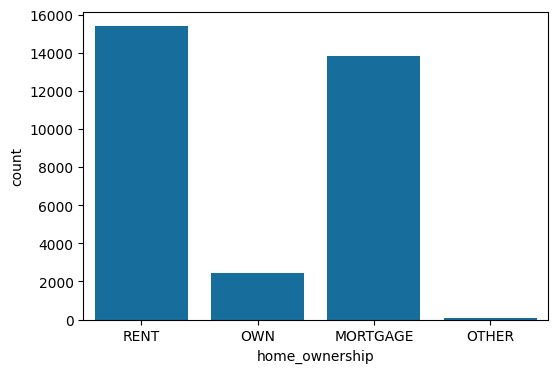

In [66]:
fig, ax = plt.subplots(figsize = (6,4))
# ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df1[df1['loan_status']=='Fully Paid'])

In [67]:
"""Purpose"""

'Purpose'

<Axes: xlabel='count', ylabel='purpose'>

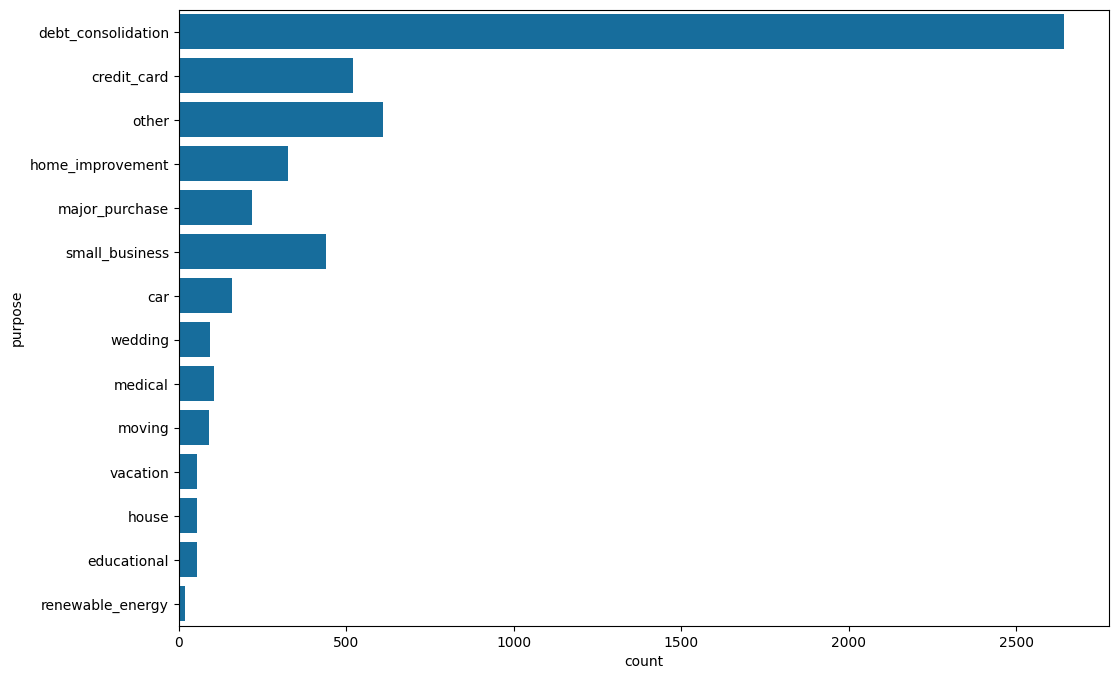

In [68]:
fig, ax = plt.subplots(figsize = (12,8))
# ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df1[df1.loan_status == 'Charged Off'], order = df1['purpose'].value_counts().index)

<Axes: xlabel='count', ylabel='purpose'>

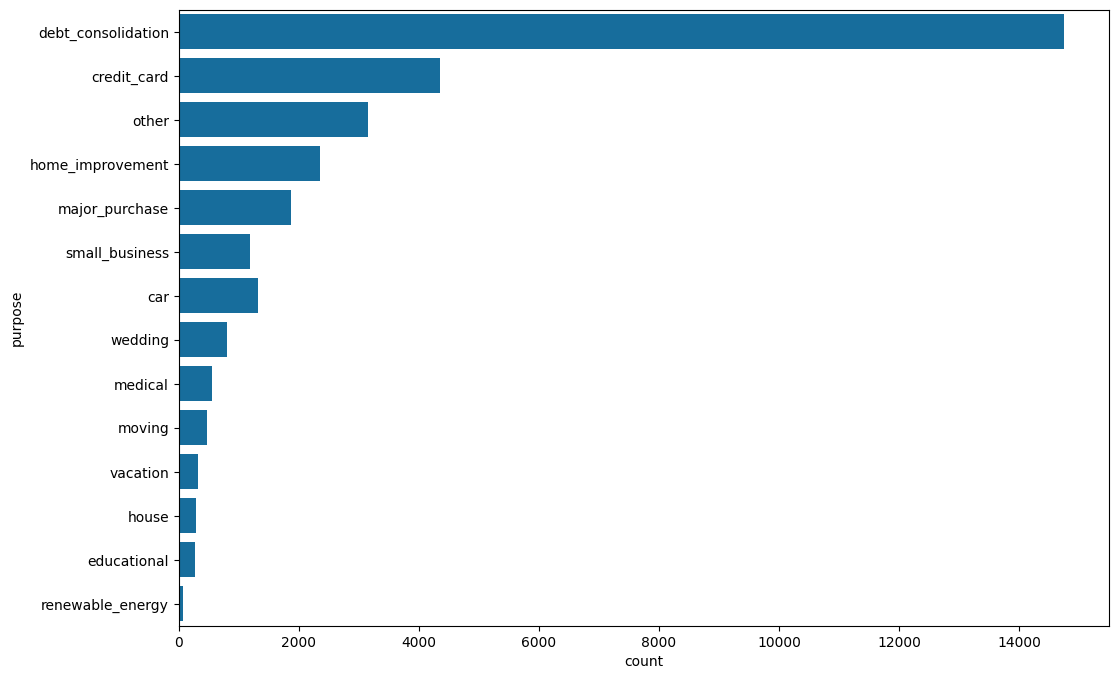

In [69]:
fig, ax = plt.subplots(figsize = (12,8))
# ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df1[df1.loan_status == 'Fully Paid'],order = df1['purpose'].value_counts().index)

In [70]:
df1[df1.loan_status == 'Fully Paid']['purpose'].value_counts()/len(df1[df1.loan_status == 'Fully Paid'])

debt_consolidation    0.464295
credit_card           0.136907
other                 0.099094
home_improvement      0.073959
major_purchase        0.059016
car                   0.041494
small_business        0.037436
wedding               0.025513
medical               0.017428
moving                0.014880
vacation              0.010035
house                 0.009154
educational           0.008336
renewable_energy      0.002454
Name: purpose, dtype: float64

In [71]:
df1[df1.loan_status == 'Charged Off']['purpose'].value_counts()/len(df1[df1.loan_status == 'Charged Off'])

debt_consolidation    0.491450
other                 0.113197
credit_card           0.096654
small_business        0.081599
home_improvement      0.060409
major_purchase        0.040520
car                   0.029740
medical               0.019331
wedding               0.017100
moving                0.016729
house                 0.010037
educational           0.010037
vacation              0.009851
renewable_energy      0.003346
Name: purpose, dtype: float64

 - The major difference in terms of small business. The percentage of defaulters are more in small business as compared to those who fully paid

In [72]:
df1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0,0.0,2
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,4


<Axes: xlabel='count', ylabel='emp_length'>

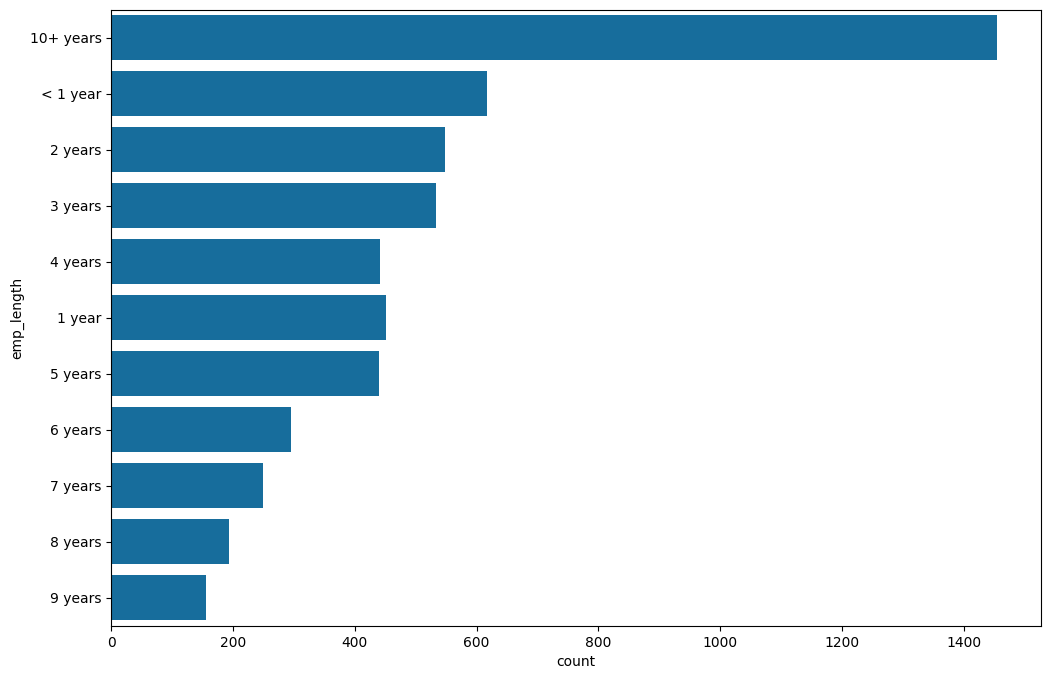

In [73]:
fig, ax = plt.subplots(figsize = (12,8))
# ax.set(xscale = 'log')
sns.countplot(y ='emp_length', data=df1[df1.loan_status == 'Charged Off'],order = df1['emp_length'].value_counts().index)

<Axes: xlabel='count', ylabel='emp_length'>

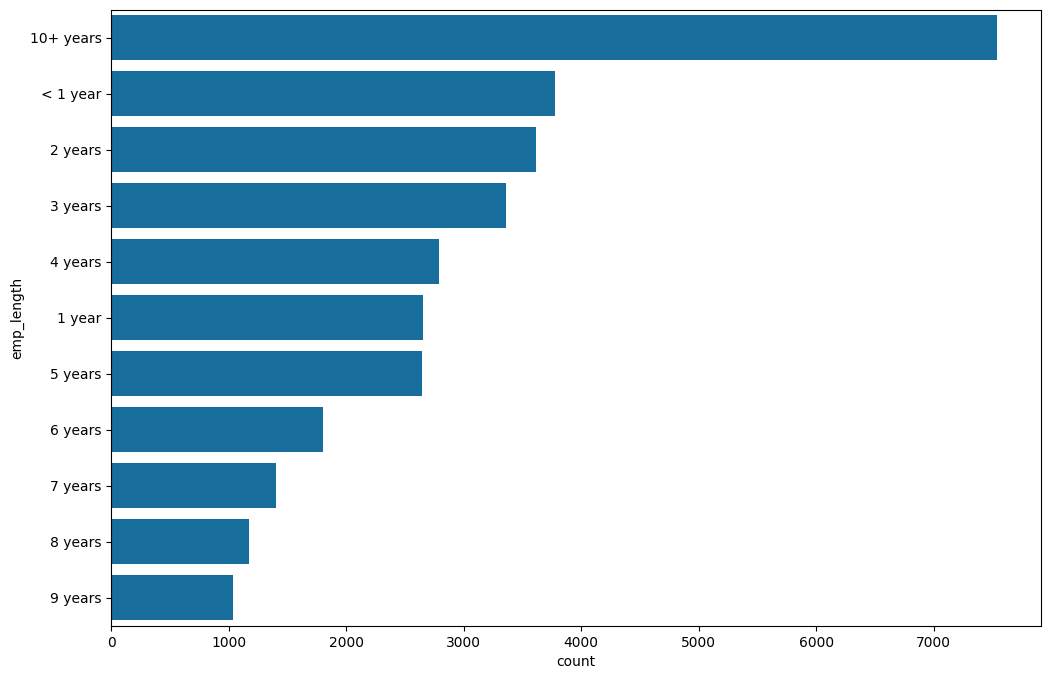

In [74]:
fig, ax = plt.subplots(figsize = (12,8))
# ax.set(xscale = 'log')
sns.countplot(y ='emp_length', data=df1[df1.loan_status == 'Fully Paid'],order = df1['emp_length'].value_counts().index)

In [91]:
df1[df1.loan_status == 'Fully Paid']['emp_length'].value_counts()/len(df1[df1.loan_status == 'Fully Paid'])

10+ years    0.237165
< 1 year     0.118724
2 years      0.113722
3 years      0.105795
4 years      0.087675
1 year       0.083333
5 years      0.083270
6 years      0.056720
7 years      0.044168
8 years      0.036838
9 years      0.032591
Name: emp_length, dtype: float64

In [92]:
df1[df1.loan_status == 'Charged Off']['emp_length'].value_counts()/len(df1[df1.loan_status == 'Charged Off'])

10+ years    0.270446
< 1 year     0.114684
2 years      0.101859
3 years      0.099071
1 year       0.084015
4 years      0.081970
5 years      0.081784
6 years      0.055019
7 years      0.046468
8 years      0.035874
9 years      0.028810
Name: emp_length, dtype: float64

 - emp_length doesn't play much role as a deciding factor for defaulters

In [75]:
df1['int_rate'].describe()

count      38200
unique       370
top       10.99%
freq         917
Name: int_rate, dtype: object

In [76]:
df1.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0,0.0,2
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,4


In [303]:
df1['int_rate_num'] =df1['int_rate'].apply(lambda x: x[:-1]).apply(lambda x: float(x))

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/3993652370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['int_rate_num'] =df1['int_rate'].apply(lambda x: x[:-1]).apply(lambda x: float(x))


In [78]:
df1['int_rate_num'].describe()

count    38200.000000
mean        11.924790
std          3.670524
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate_num, dtype: float64

In [79]:
df1.pub_rec.value_counts()

0    36125
1     2017
2       49
3        7
4        2
Name: pub_rec, dtype: int64

In [80]:
df1.revol_bal.describe()

count     38200.000000
mean      12712.741571
std       14690.583528
min           0.000000
25%        3626.000000
50%        8625.000000
75%       16420.500000
max      149527.000000
Name: revol_bal, dtype: float64

In [93]:
df1[df1.loan_status == 'Charged Off']['revol_bal'].describe()

count      5380.000000
mean      12940.731227
std       14571.561232
min           0.000000
25%        3893.000000
50%        8848.500000
75%       16753.000000
max      147365.000000
Name: revol_bal, dtype: float64

In [94]:
df1[df1.loan_status == 'Fully Paid']['revol_bal'].describe()

count     31788.000000
mean      12595.649931
std       14721.497133
min           0.000000
25%        3524.000000
50%        8473.000000
75%       16225.250000
max      149527.000000
Name: revol_bal, dtype: float64

In [81]:
df1.total_acc.describe()

count    38200.000000
mean        21.801283
std         11.291574
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [82]:
df1[df1.revol_util == 'nan']['loan_status'].value_counts()

Series([], Name: loan_status, dtype: int64)

In [304]:
df1.revol_util = df1.revol_util.astype('str')
df1['revol_util_num'] =df1['revol_util'].apply(lambda x: x[:-1]).apply(lambda x: pd.to_numeric(x, errors='coerce')
)

/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/3605642269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.revol_util = df1.revol_util.astype('str')
/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/3605642269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revol_util_num'] =df1['revol_util'].apply(lambda x: x[:-1]).apply(lambda x: pd.to_numeric(x, errors='coerce')


In [84]:
df1.revol_util_num = df1.revol_util_num.fillna(df1['revol_util_num'].mean())

In [85]:
df1.revol_util_num.describe()

count    38200.000000
mean        48.766015
std         28.278636
min          0.000000
25%         25.400000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util_num, dtype: float64

In [95]:
df1[df1.loan_status == 'Charged Off']['revol_util_num'].describe()

count    5380.000000
mean       55.451852
std        27.874311
min         0.000000
25%        34.300000
50%        58.100000
75%        78.900000
max        99.900000
Name: revol_util_num, dtype: float64

In [96]:
df1[df1.loan_status == 'Fully Paid']['revol_util_num'].describe()

count    31788.000000
mean        47.502073
std         28.218481
min          0.000000
25%         24.000000
50%         47.600000
75%         70.700000
max         99.900000
Name: revol_util_num, dtype: float64

The mean and median revol_util is higher for defaulters

In [86]:
df1['annual_inc'].describe()

count     38200.000000
mean      63340.899299
std       31897.600420
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       80000.000000
max      187000.000000
Name: annual_inc, dtype: float64

In [97]:
df1[df1.loan_status == 'Fully Paid']['annual_inc'].describe()

count     31788.000000
mean      64103.241256
std       32043.927077
min        4000.000000
25%       40006.000000
50%       58000.000000
75%       80000.000000
max      187000.000000
Name: annual_inc, dtype: float64

In [98]:
df1[df1.loan_status == 'Charged Off']['annual_inc'].describe()

count      5380.000000
mean      57788.592056
std       30114.905804
min        4080.000000
25%       36000.000000
50%       51600.000000
75%       72000.000000
max      187000.000000
Name: annual_inc, dtype: float64

In [255]:
df1['loan_amnt'].describe()

count    39717.000000
mean     11154.856485
std       7263.615387
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      31468.000000
Name: loan_amnt, dtype: float64

Mean and median annual income is lower for defaulters as compared to non-defaulters

In [307]:
"""Binning to further drill down"""

df1['int_rate_bins'] = pd.cut(df1['int_rate_num'], bins=4,precision =0,labels = ['5-10','10-15','15-20','20-25'])

df1['total_acc_bins'] = pd.cut(df1['total_acc'], bins=9,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])

df1['revol_util_bins'] = pd.cut(df1['revol_util_num'], bins=10,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])

df1['annual_inc_bins'] = pd.cut(df1['annual_inc'], bins=5,precision =0,labels=['0-40000','40000-80000','80000-120000','120000-160000','160000-200000'])

df1['loan_amt_bins'] = pd.cut(df1['loan_amnt'], bins=4,precision =0,labels=['0-5500','5500-10000','10000-15000','15000-35000'])



/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/2344774238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['int_rate_bins'] = pd.cut(df1['int_rate_num'], bins=4,precision =0,labels = ['5-10','10-15','15-20','20-25'])
/var/folders/p6/0dz4x4r92h721128g5vjmykw0000gp/T/ipykernel_20164/2344774238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_acc_bins'] = pd.cut(df1['total_acc'], bins=9,precision =0,labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','8

In [100]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num,int_rate_num,revol_util_num,int_rate_bins,total_acc_bins,revol_util_bins,annual_inc_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0,2,10.65,83.7,10-15,0-10,80-90,0-40000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,4,15.27,9.4,15-20,0-10,0-10,0-40000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0,5,15.96,98.5,15-20,0-10,90-100,0-40000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0,1,13.49,21.0,10-15,30-40,20-30,40000-80000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0,5,12.69,53.9,10-15,30-40,50-60,80000-120000


array([<Axes: title={'center': 'Charged Off'}, xlabel='loan_amt_bins'>,
       <Axes: title={'center': 'Current'}, xlabel='loan_amt_bins'>,
       <Axes: title={'center': 'Fully Paid'}, xlabel='loan_amt_bins'>],
      dtype=object)

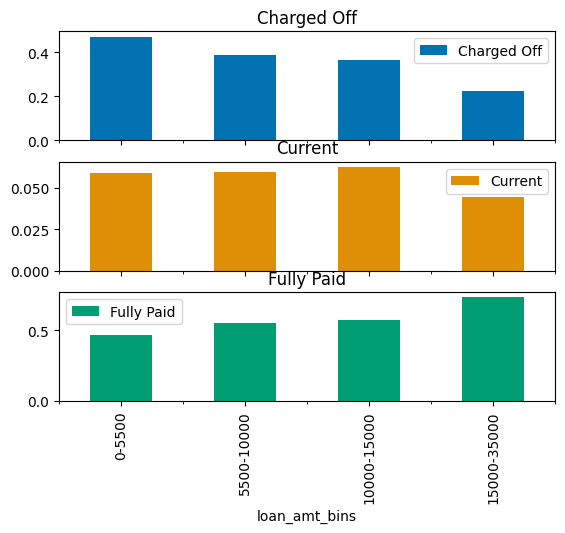

In [310]:
pd.crosstab(df1[(df1.grade == 'G')]['loan_amt_bins'],df1[(df1.grade == 'G')]['loan_status'], normalize='index').plot.bar(subplots=True)

In [313]:
df1[(df1.grade == 'G') & (df1.loan_amnt <= 5500)]['loan_status'].value_counts()/len(df1[(df1.grade == 'G') & (df1.loan_amnt <= 5500)])

Fully Paid     0.473684
Charged Off    0.473684
Current        0.052632
Name: loan_status, dtype: float64

 - Borrowers who applied for loan amount less than amount 5600, they have equal default rate as compared to nin-defaulters(~47%). This is the most high risk zone

In [ ]:
pd.crosstab(df1.loan_amt_bins,df1.loan_status, normalize='index').plot.bar(subplots=True)

In [142]:
pd.crosstab(df1.revol_util_bins,df1.loan_status,  normalize='index')

loan_status,Charged Off,Current,Fully Paid
revol_util_bins,,,
0-10,0.095205,0.018389,0.886406
10-20,0.099755,0.019890,0.880355
20-30,0.109282,0.025364,0.865353
30-40,0.120954,0.027102,0.851945
40-50,0.139424,0.025458,0.835118
50-60,0.143987,0.029708,0.826306
60-70,0.154692,0.033480,0.811828
70-80,0.170537,0.030960,0.798504
80-90,0.180842,0.032778,0.786380


array([<Axes: title={'center': 'Charged Off'}, xlabel='revol_util_bins'>,
       <Axes: title={'center': 'Current'}, xlabel='revol_util_bins'>,
       <Axes: title={'center': 'Fully Paid'}, xlabel='revol_util_bins'>],
      dtype=object)

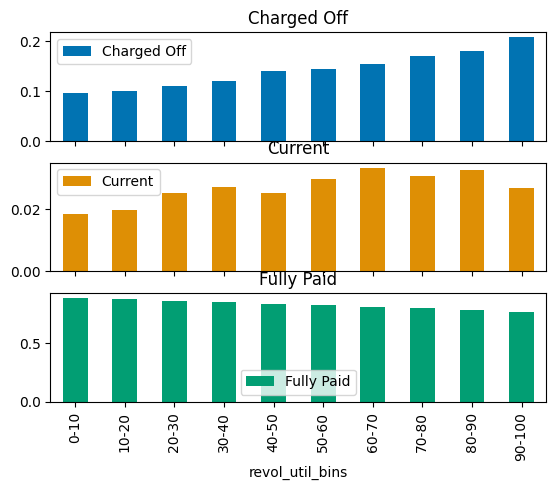

In [141]:
pd.crosstab(df1.revol_util_bins,df1.loan_status,  normalize='index').plot.bar(subplots=True)

array([<Axes: title={'center': 'Charged Off'}, xlabel='annual_inc_bins'>,
       <Axes: title={'center': 'Current'}, xlabel='annual_inc_bins'>,
       <Axes: title={'center': 'Fully Paid'}, xlabel='annual_inc_bins'>],
      dtype=object)

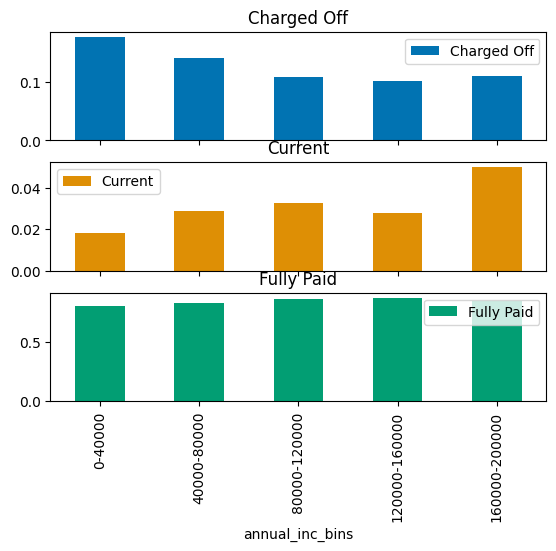

In [144]:
pd.crosstab( df1.annual_inc_bins,df1.loan_status, normalize='index').plot.bar(subplots=True)

array([<Axes: title={'center': 'Charged Off'}, xlabel='total_acc_bins'>,
       <Axes: title={'center': 'Current'}, xlabel='total_acc_bins'>,
       <Axes: title={'center': 'Fully Paid'}, xlabel='total_acc_bins'>],
      dtype=object)

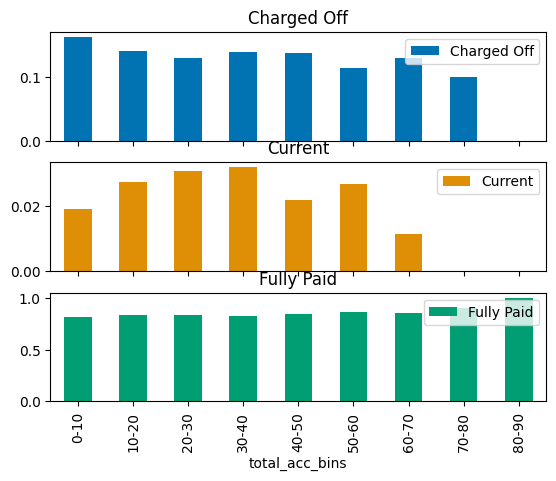

In [145]:
pd.crosstab( df1.total_acc_bins, df1.loan_status, normalize='index').plot.bar(subplots=True)

array([<Axes: title={'center': 'Charged Off'}, xlabel='int_rate_bins'>,
       <Axes: title={'center': 'Current'}, xlabel='int_rate_bins'>,
       <Axes: title={'center': 'Fully Paid'}, xlabel='int_rate_bins'>],
      dtype=object)

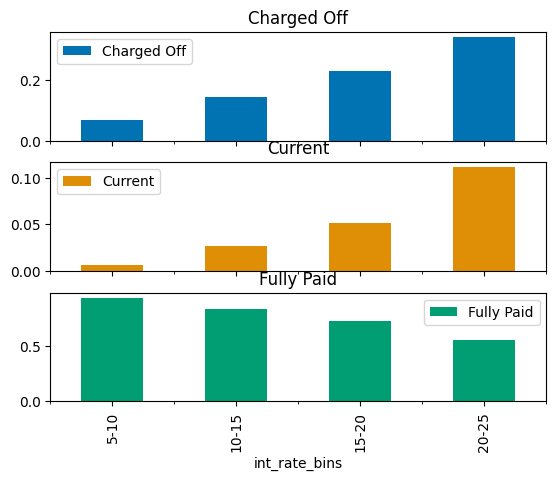

In [146]:
pd.crosstab( df1.int_rate_bins, df1.loan_status, normalize='index').plot.bar(subplots=True)

In [151]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num,int_rate_num,revol_util_num,int_rate_bins,total_acc_bins,revol_util_bins,annual_inc_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0,2,10.65,83.7,10-15,0-10,80-90,0-40000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,4,15.27,9.4,15-20,0-10,0-10,0-40000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0,5,15.96,98.5,15-20,0-10,90-100,0-40000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0,1,13.49,21.0,10-15,30-40,20-30,40000-80000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0,5,12.69,53.9,10-15,30-40,50-60,80000-120000


In [152]:
df1['issue_d'] = pd.to_datetime(df1.issue_d, format='%b-%y')

In [155]:
df1['earliest_cr_line'] = pd.to_datetime(df1.earliest_cr_line, format='%b-%y')

In [156]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num,int_rate_num,revol_util_num,int_rate_bins,total_acc_bins,revol_util_bins,annual_inc_bins,issue_d_year,issue_d_month,issue_d_weekday
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0,2,10.65,83.7,10-15,0-10,80-90,0-40000,2011,Dec,3
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,4,15.27,9.4,15-20,0-10,0-10,0-40000,2011,Dec,3
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0,5,15.96,98.5,15-20,0-10,90-100,0-40000,2011,Dec,3
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0,1,13.49,21.0,10-15,30-40,20-30,40000-80000,2011,Dec,3
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0,5,12.69,53.9,10-15,30-40,50-60,80000-120000,2011,Dec,3


In [157]:
#issue_d column
df1['issue_d_year'] = df1.issue_d.dt.year
df1['issue_d_month'] = df1.issue_d.dt.strftime('%b')
df1['issue_d_weekday'] = df1.issue_d.dt.weekday
#data type conversion of year and weekday
df1['issue_d_year'] = df1['issue_d_year'].astype(object)
df1['issue_d_weekday'] = df1['issue_d_weekday'].astype(object)

#earliest_cr_line
df1['earliest_cr_line_year'] = df1.earliest_cr_line.dt.year
df1['earliest_cr_line_month'] = df1.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
df1['earliest_cr_line_year'] = df1['earliest_cr_line_year'].astype(object)

In [158]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,pub_rec_bankruptcies,sub_grade_num,int_rate_num,revol_util_num,int_rate_bins,total_acc_bins,revol_util_bins,annual_inc_bins,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,0.0,2,10.65,83.7,10-15,0-10,80-90,0-40000,2011,Dec,3,1985,Jan
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,0.0,4,15.27,9.4,15-20,0-10,0-10,0-40000,2011,Dec,3,1999,Apr
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,0.0,5,15.96,98.5,15-20,0-10,90-100,0-40000,2011,Dec,3,2001,Nov
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,0.0,1,13.49,21.0,10-15,30-40,20-30,40000-80000,2011,Dec,3,1996,Feb
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,0.0,5,12.69,53.9,10-15,30-40,50-60,80000-120000,2011,Dec,3,1996,Jan


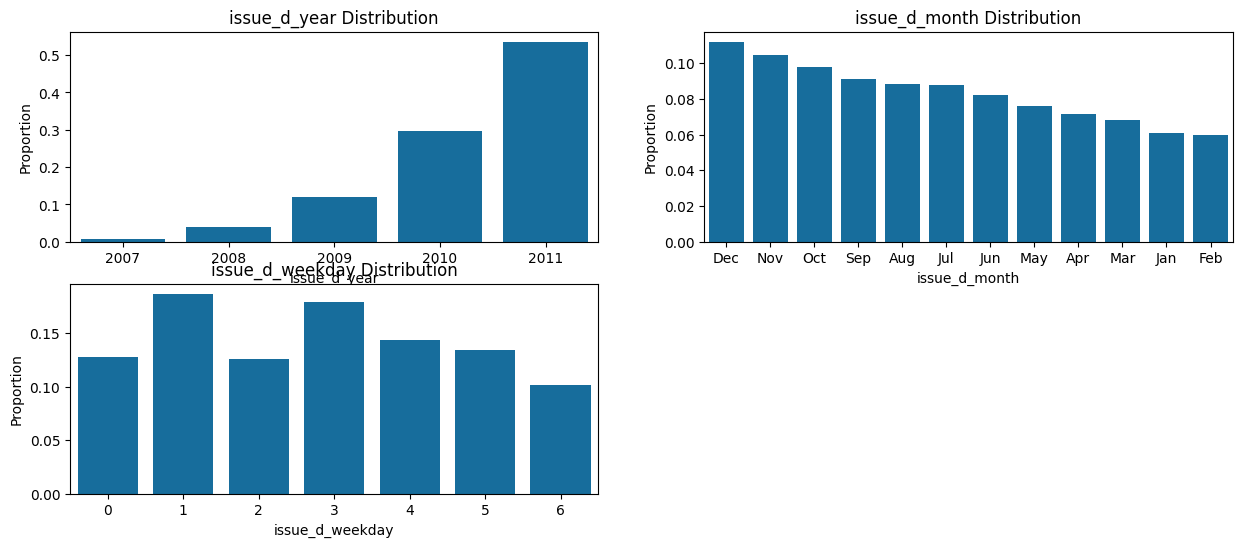

In [163]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = df1[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = df1[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = df1[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

 - Most of the borrowers got loans issued in the month of Dec and in year 2011
 - Most of them got credit line in the month of Oct to Jan.

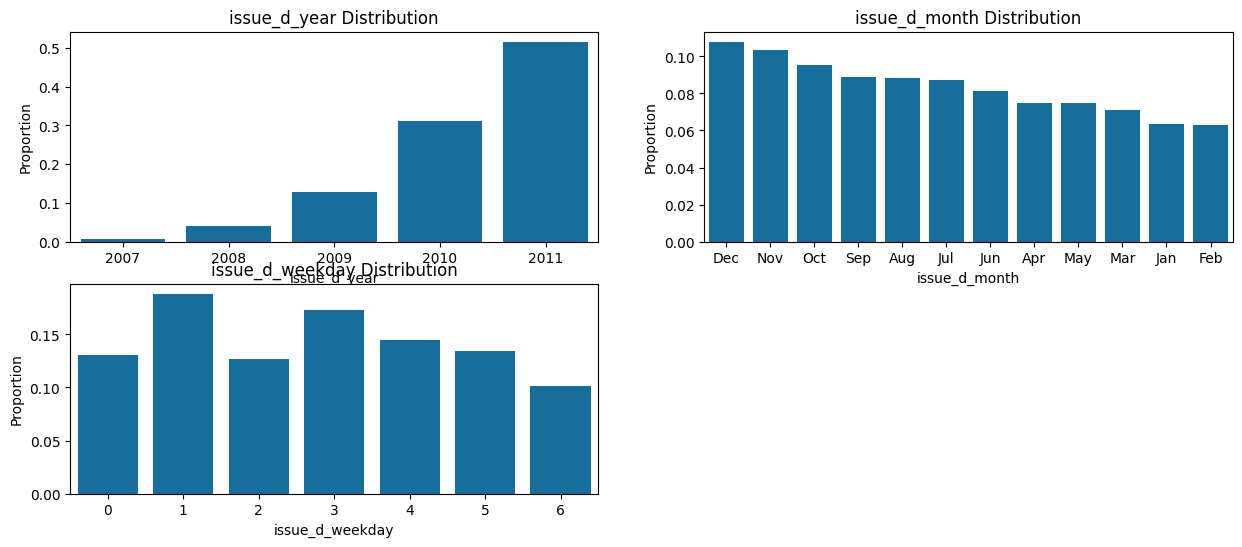

In [175]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = df1[df1.loan_status == 'Fully Paid'][var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = df1[df1.loan_status == 'Fully Paid'][var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = df1[df1.loan_status == 'Fully Paid'][var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

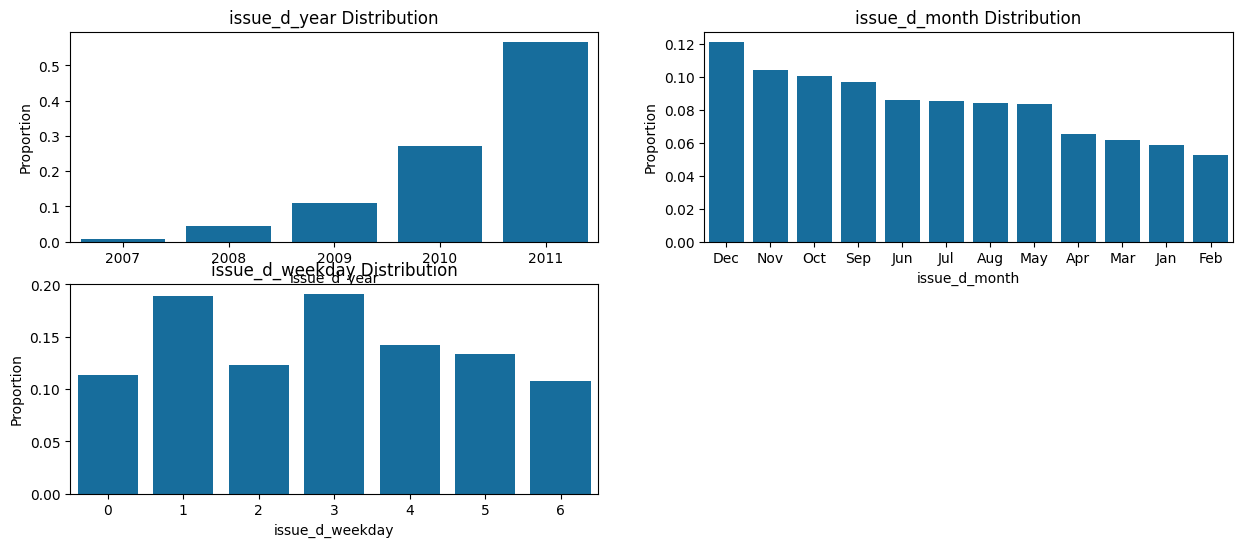

In [176]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = df1[df1.loan_status == 'Charged Off'][var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = df1[df1.loan_status == 'Charged Off'][var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = df1[df1.loan_status == 'Charged Off'][var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

- There isn't much difference in defaulters vs who paid in terms of loan issued in year, month and weekday

In [165]:
df1.earliest_cr_line_year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1981, 1982, 1971, 1972,
       1970, 1975, 1978, 1976, 2062, 2068, 1974, 1977, 2064, 2067, 2063,
       1969, 2065, 2054, 2066, 2059, 2056, 2046, 2050, 2061], dtype=object)

In [166]:
df1.earliest_cr_line_year.max()

2068

In [167]:
df1.earliest_cr_line_year.min()

1969

In [169]:
df1 = df1[df1.earliest_cr_line_year <= 2024]

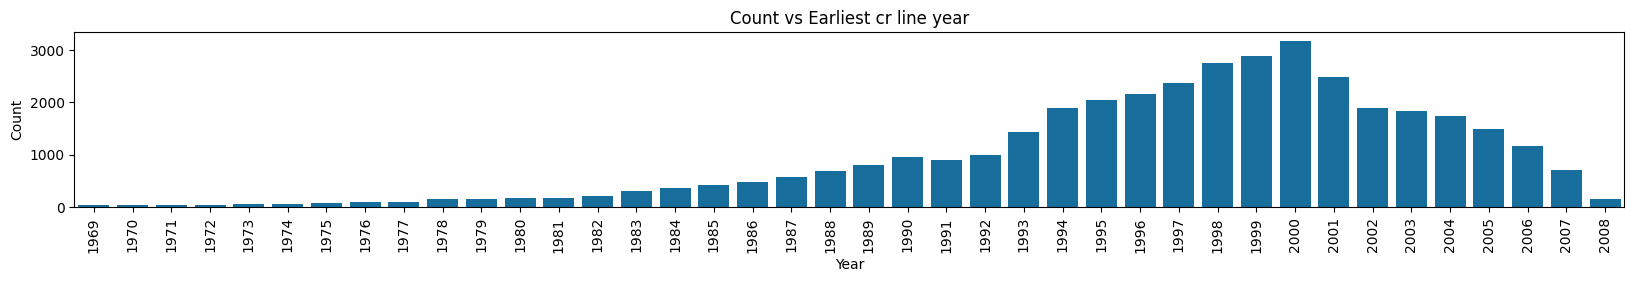

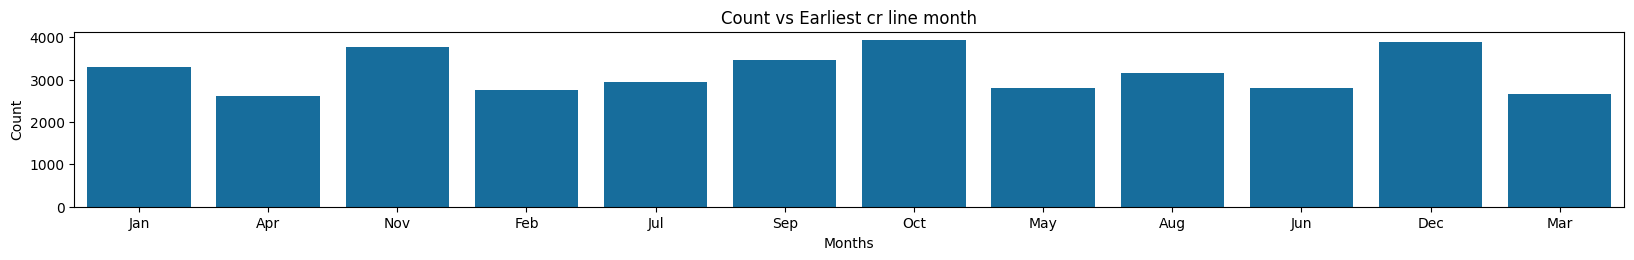

In [174]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(x = 'earliest_cr_line_year', data = df1)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))  
plt.subplot(2,1,2)
sns.countplot(x = 'earliest_cr_line_month', data = df1)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

 - Most of the borrowers got earliest credit line in 2000, followed by plus minus 5 years
 - Most of them got credit line in the month of Oct to Jan.